# Explorer le corpus de Camille apres selection: 
#### Requete: ("amour" OR "mariage" OR "relation" OR "liaison") AND ("homosexuel" OR "homosexuelle" OR "transgenre" OR "transsexuel" OR "changement de genre" OR "union libre" OR "couple atypique" OR "liaison interdite" OR "amour interdit" OR "liaison secrète")

## Imports

In [22]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [23]:
# verification où on est
import os
os.getcwd()


'/Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/tps/tp4'

## Compter le nombre de documents dans le corpus

In [24]:
path = "../../data/txt_tp4"

files = sorted(os.listdir(path))
len(files)
print(f"Nombre total de fichiers dans le corpus : {len(files)}")

Nombre total de fichiers dans le corpus : 512


## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

## Comptage des fichiers par journal, décennie et mois

Ce bloc parcourt les fichiers du corpus, ignore ceux qui ne sont pas des articles, extrait le nom du journal, l'année et le mois, calcule la décennie, met à jour les compteurs par journal, décennie et mois, et signale les fichiers ou dates malformés.




In [57]:
for f in files:
    # Ignorer tout fichier qui ne commence pas par "KB_" ou ne se termine pas par ".txt"
    if not f.startswith("KB_") or not f.endswith(".txt"):
        continue
    
    elems = f.split("_")
    if len(elems) >= 3:
        newspaper = elems[1]
        date_parts = elems[2].split("-")
        if len(date_parts) >= 2:
            year = date_parts[0]
            month = int(date_parts[1])
            decade = year[:3] + "0s"

            count_decade[decade] += 1
            count_newspapers[newspaper] += 1
            count_month[month] += 1
            covered_years.add(year)
        else:
            print(f"Date malformed in file: {f}")
    else:
        print(f"Filename malformed: {f}")



In [62]:
all_years = [str(year) for year in range(1831, 1993)]

In [63]:
# afficher les resultats
# Affichage du nombre d'articles par journal
print("Nombre d'articles par journal :")
for journal, count in count_newspapers.items():
    print(f"{journal}: {count}")

# Affichage du nombre d'articles par décennie
print("\nNombre d'articles par décennie :")
for decade, count in count_decade.items():
    print(f"{decade}: {count}")

# Affichage du nombre d'articles par mois
print("\nNombre d'articles par mois :")
for month, count in sorted(count_month.items()):
    print(f"Mois {month}: {count}")


Nombre d'articles par journal :
JB1051: 216
JB421: 102
JB427: 144
JB555: 318
JB567: 222
JB572: 432
JB638: 282
JB685: 84
JB729: 192
JB773: 48
JB837: 276
JB838: 750

Nombre d'articles par décennie :
1920s: 414
1940s: 300
1950s: 144
1960s: 318
1890s: 168
1900s: 708
1910s: 366
1930s: 534
1850s: 18
1870s: 30
1880s: 30
1860s: 12
1970s: 24

Nombre d'articles par mois :
Mois 1: 252
Mois 2: 264
Mois 3: 276
Mois 4: 198
Mois 5: 288
Mois 6: 210
Mois 7: 174
Mois 8: 120
Mois 9: 246
Mois 10: 552
Mois 11: 258
Mois 12: 228


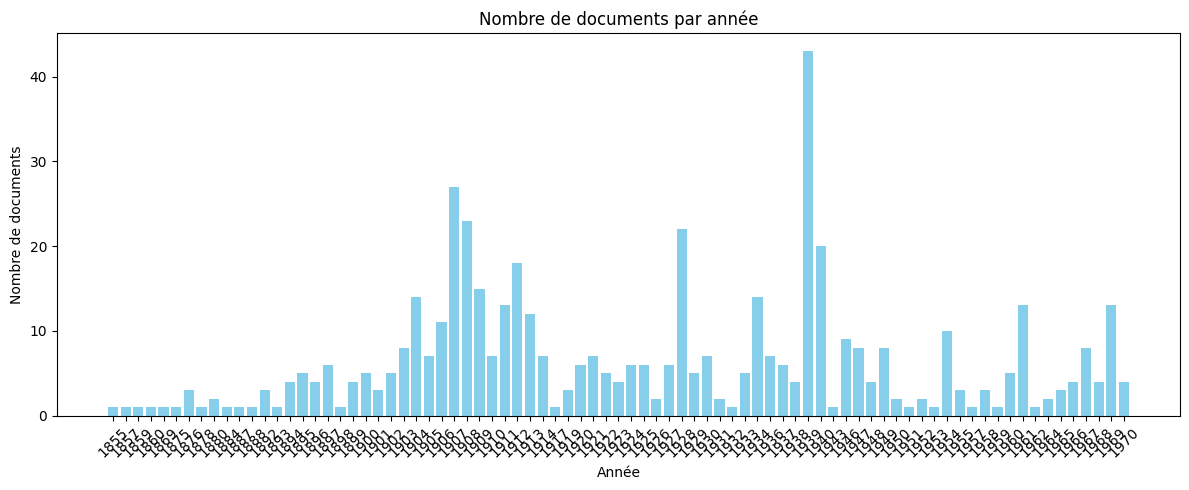

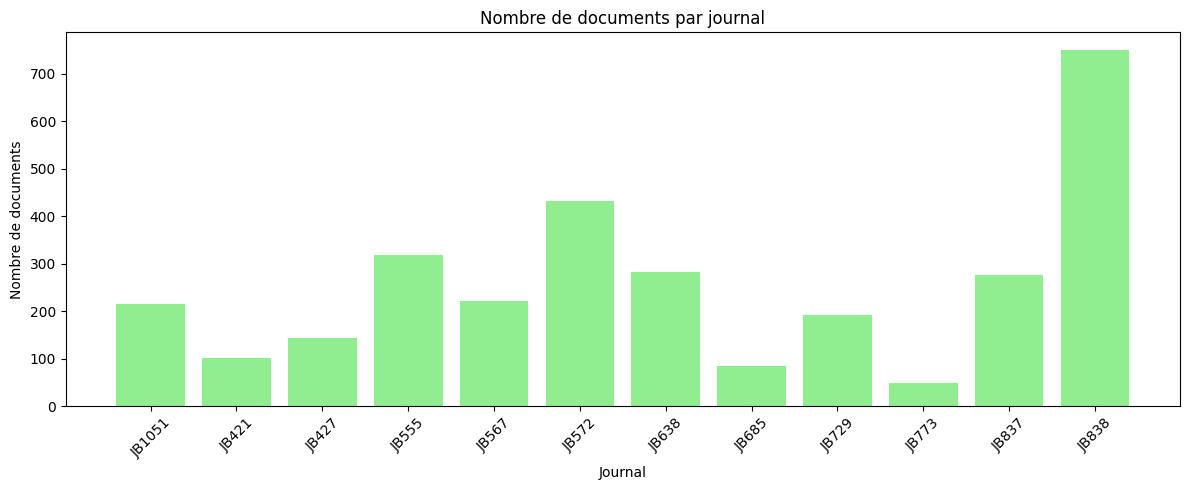

In [60]:
import matplotlib.pyplot as plt

# --- Graphique 1 : Nombre de documents par année ---
years_sorted = sorted(covered_years)  # années couvertes triées
counts_per_year = [sum(1 for f in files if f.startswith("KB_") and f.endswith(".txt") and f.split("_")[2].split("-")[0] == y) for y in years_sorted]

plt.figure(figsize=(12, 5))
plt.bar(years_sorted, counts_per_year, color='skyblue')
plt.xlabel("Année")
plt.ylabel("Nombre de documents")
plt.title("Nombre de documents par année")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Graphique 2 : Nombre de documents par journal ---
journals = list(count_newspapers.keys())
counts_per_journal = [count_newspapers[j] for j in journals]

plt.figure(figsize=(12, 5))
plt.bar(journals, counts_per_journal, color='lightgreen')
plt.xlabel("Journal")
plt.ylabel("Nombre de documents")
plt.title("Nombre de documents par journal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Quelques statistiques

In [14]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

NameError: name 'defaultdict' is not defined

In [15]:
print(f"Il y a {count_newspapers['JB838']} exemplaires du journal Le Soir et {count_newspapers['JB427']} exemplaires de La Libre Belgique")

NameError: name 'count_newspapers' is not defined

In [ ]:
print(f"Il y a {count_decade['1930s']} fichiers pour la décennie 1930s")

In [ ]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

## Visualisation du nombre de journaux par mois

Ces visualisations sont obtenues avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

In [12]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

NameError: name 'np' is not defined